# Weather Prediction of the City of Toronto

## Abstract

In this project endeavors to predict the average temperature of Toronto using historical weather data spanning from 2002 to 2023. Employing machine learning methodologies, we have constructed predictive models leveraging both Ridge Regression and Decision Tree algorithms. The dataset, procured from Kaggle, encompasses ten columns with the Date serving as the index, covering key weather parameters such as precipitation, snow depth, and temperature metrics (average, maximum, and minimum). Through rigorous analysis and model development, we aim to enhance our understanding of Toronto's climate dynamics and improve temperature prediction accuracy.

## Introduction

Accurate temperature prediction is crucial for various applications, including urban planning, agriculture, and climate research. In this project, we focus on forecasting the average temperature of Toronto, a prominent city in Canada, utilizing historical weather data. Leveraging machine learning techniques, specifically Ridge Regression and Decision Trees, we endeavor to develop robust predictive models based on pertinent weather features. By delving into the Kaggle dataset, we seek to unravel intricate climate patterns and refine temperature forecasting capabilities.

## Research Objectives:

Develop predictive models using Ridge Regression and Decision Trees to forecast the average temperature of Toronto. \
Explore the relationship between weather attributes (e.g., precipitation, snow depth) and average temperature. \
Assess the performance of Ridge Regression and Decision Tree models and discern factors influencing temperature predictions. 

## Dataset Description:

The Kaggle dataset spans from 2002 to 2023 and comprises ten columns:

STATION:    Station identifier or code.

NAME:       Station name.

LATITUDE:   Latitude of the station.

LONGITUDE:  Longitude of the station.

ELEVATION:  Elevation of the station.

PRCP:       Precipitation.

SNWD:       Snow depth.

TAVG:       Average temperature.

TMAX:       Maximum temperature.

TMIN:       Minimum temperature.

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


C:\Users\sanaa\AppData\Local\Temp\ipykernel_10124\1813150574.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("weather_yyz.csv", index_col="DATE")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7520 entries, 2002-06-04 to 2023-02-11
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    7520 non-null   object 
 1   NAME       7520 non-null   object 
 2   LATITUDE   7520 non-null   float64
 3   LONGITUDE  7520 non-null   float64
 4   ELEVATION  7520 non-null   float64
 5   PRCP       7363 non-null   float64
 6   SNWD       2496 non-null   float64
 7   TAVG       6681 non-null   float64
 8   TMAX       7430 non-null   float64
 9   TMIN       7439 non-null   float64
dtypes: float64(8), object(2)
memory usage: 646.2+ KB


In [3]:
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,
2002-06-04,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.19,NaN,NaN,57.0,48.0
2002-06-05,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.13,NaN,NaN,74.0,52.0
2002-06-06,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,NaN,NaN,64.0,55.0
2002-06-07,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,NaN,NaN,71.0,52.0
2002-06-08,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,NaN,NaN,77.0,53.0


# Understanding the data through visualization

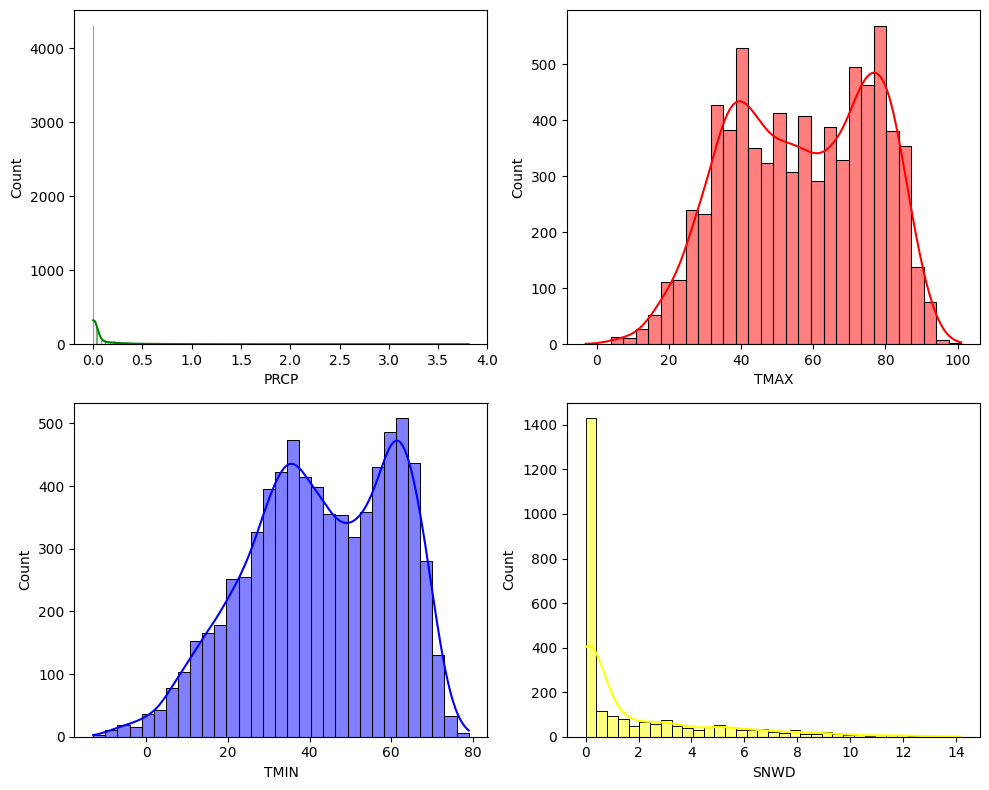

In [4]:
columns = ['PRCP', 'TMAX', 'TMIN', 'SNWD']
colors = ["green", "red", "blue", "yellow"]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(columns):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

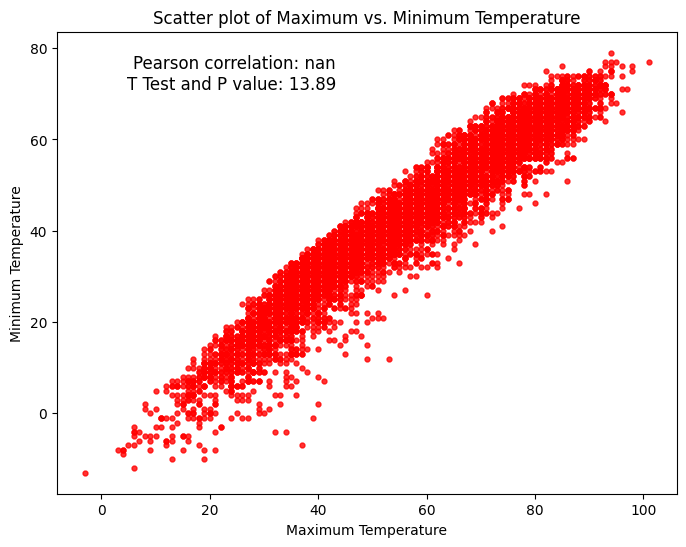

In [5]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["TMAX"], y=data["TMIN"], marker='.', s=50, alpha=0.8, color='red')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["TMAX"], data["TMIN"])[0, 1], np.mean(np.abs(np.subtract(data["TMAX"], data["TMIN"])))

# Display the correlation and p-value on the plot
ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')

Based on the above graph, we can comment that the variable tmin and the variable tmax have a positive relationship with each other. However, the correlation coefficient is shown to be NaN, which could be indicating the presence of null values.

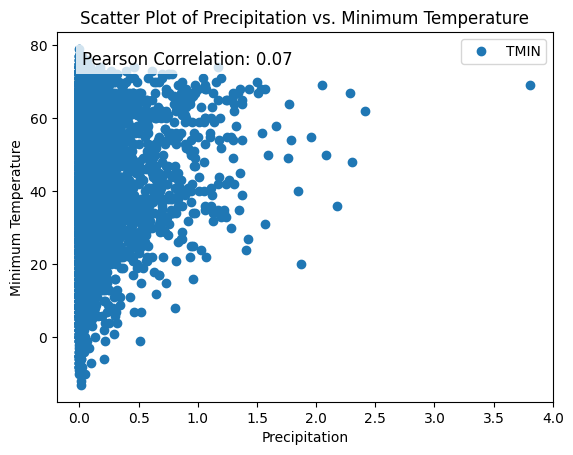

In [6]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["PRCP"].corr(data["TMIN"])
ttest, pvalue = stats.ttest_ind(data["PRCP"],data["TMIN"])

# Use a context manager to apply the default style to the plot
with plt.style.context('default'):
    
    # Create a scatter plot of the precipitation and temp_max variables
    ax = data.plot("PRCP", "TMIN", style='o')
    
    # Add a title to the plot
    ax.set_title('Scatter Plot of Precipitation vs. Minimum Temperature')
    
    # Add labels to the x and y axes
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Minimum Temperature')
    
    # Add a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

A correlation coefficient of 0.07 suggests a very weak positive linear relationship between precipitation and minimum temperature. This means that as precipitation increases, minimum temperature tends to increase slightly, but the relationship is too weak to be meaningful.

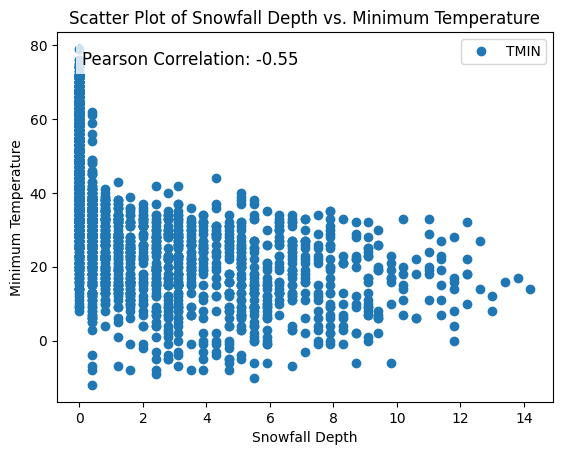

In [7]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["SNWD"].corr(data["TMIN"])
ttest, pvalue = stats.ttest_ind(data["SNWD"],data["TMIN"])

# Use a context manager to apply the default style to the plot
with plt.style.context('default'):
    
    # Create a scatter plot of the precipitation and temp_max variables
    ax = data.plot("SNWD", "TMIN", style='o')
    
    # Add a title to the plot
    ax.set_title('Scatter Plot of Snowfall Depth vs. Minimum Temperature')
    
    # Add labels to the x and y axes
    ax.set_xlabel('Snowfall Depth')
    ax.set_ylabel('Minimum Temperature')
    
    # Add a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

A Pearson correlation coefficient of -0.55 between snow depth and minimum temperature signifies a moderate negative linear relationship between the two variables. We can conclude that there is a moderate tendency for minimum temperature to decrease as snow depth increases.

## Preparing the data
We remove the null values, make sure all the columns are in the right data type and make sure the data is consistent, in this case, there exists weather data for every day from the year 1970 to the present.

In [8]:
#Removing null values
null_pcnt = data.apply(pd.isnull).sum()/data.shape[0]
null_pcnt

STATION      0.000000
NAME         0.000000
LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
PRCP         0.020878
SNWD         0.668085
TAVG         0.111569
TMAX         0.011968
TMIN         0.010771
dtype: float64

We are only considering those columns whos percentage of null values are less than 0.05

In [9]:
valid_columns = data.columns[null_pcnt < 0.05]
valid_columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'TMAX',
       'TMIN'],
      dtype='object')

In [10]:
data = data[valid_columns].copy()
data.columns = data.columns.str.lower()
data.head()

,station,name,latitude,longitude,elevation,prcp,tmax,tmin
DATE,,,,,,,,
2002-06-04,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.19,57.0,48.0
2002-06-05,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.13,74.0,52.0
2002-06-06,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,64.0,55.0
2002-06-07,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,71.0,52.0
2002-06-08,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,77.0,53.0


Now for the remaining null values, we fill each missing value with last valid observation from the same column.

In [11]:
data = data.ffill()
data.apply(pd.isnull).sum()

station      0
name         0
latitude     0
longitude    0
elevation    0
prcp         0
tmax         0
tmin         0
dtype: int64

Changing the datatype of 'date' to datetime

In [12]:
data.dtypes

station       object
name          object
latitude     float64
longitude    float64
elevation    float64
prcp         float64
tmax         float64
tmin         float64
dtype: object

In [13]:
data.index = pd.to_datetime(data.index)
data.index.year.value_counts().sort_index()


DATE
2002    210
2003    360
2004    366
2005    365
2006    365
2007    365
2008    366
2009    364
2010    365
2011    365
2012    365
2013    365
2014    364
2015    362
2016    365
2017    358
2018    357
2019    363
2020    363
2021    362
2022    363
2023     42
Name: count, dtype: int64

Computing the average temperature (tavg) by taking the midpoint between the maximum (tmax) and minimum (tmin) temperatures recorded in the dataset.

In [14]:
data["tavg"] = (data["tmax"] + data["tmin"])/2

We're establishing a new column named 'target', which encapsulates the average temperature recorded for the subsequent day. Essentially, this step is aimed at instructing the model to anticipate forthcoming weather conditions.

In [15]:
data["target_tavg"] = data.shift(-1)["tavg"]
data.head()

,station,name,latitude,longitude,elevation,prcp,tmax,tmin,tavg,target_tavg
DATE,,,,,,,,,,
2002-06-04,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.19,57.0,48.0,52.5,63.0
2002-06-05,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.13,74.0,52.0,63.0,59.5
2002-06-06,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,64.0,55.0,59.5,61.5
2002-06-07,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,71.0,52.0,61.5,65.0
2002-06-08,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,77.0,53.0,65.0,73.5


In [16]:
data.apply(pd.isnull).sum()

station        0
name           0
latitude       0
longitude      0
elevation      0
prcp           0
tmax           0
tmin           0
tavg           0
target_tavg    1
dtype: int64

Since the model cannot deal with null values, we are removing the last row which contains a null value

In [17]:
data=data.iloc[:-1,:].copy() 
data

,station,name,latitude,longitude,elevation,prcp,tmax,tmin,tavg,target_tavg
DATE,,,,,,,,,,
2002-06-04,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.19,57.0,48.0,52.5,63.0
2002-06-05,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.13,74.0,52.0,63.0,59.5
2002-06-06,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,64.0,55.0,59.5,61.5
2002-06-07,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,71.0,52.0,61.5,65.0
2002-06-08,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,77.0,53.0,65.0,73.5
...,...,...,...,...,...,...,...,...,...,...
2023-02-06,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,38.0,28.0,33.0,40.0
2023-02-07,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,48.0,32.0,40.0,41.0
2023-02-08,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,0.00,46.0,36.0,41.0,40.5


## Modelling the data

### Ridge Regression Model

We utilized a Ridge Regression model with a regularization parameter (alpha) set to 0.1. The predictors used for modeling were defined as ["prcp", "tmax", "tmin", "tavg"]. The backtesting process involved splitting the data into training and testing sets, where the model was trained on historical data and evaluated on subsequent time periods. The backtesting function iterated over the dataset with a specified start index and step size, fitting the model to each training set and making predictions for the corresponding testing set.

In [18]:
reg = Ridge(alpha=.1)

In [19]:
predictors = ["prcp","tmax","tmin","tavg"]

In [20]:
def backtest(data, model, predictors, start = 3650, step = 90, param_grid = None, cv = None, scoring = None):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[:i,:]
        test = data.iloc[i:(i+step),:]

        if param_grid:
            # Perform grid search with cross-validation
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring)
            grid_search.fit(train[predictors], train["target_tavg"])
            
            # Get the best model from grid search
            best_model = grid_search.best_estimator_
        else:
            best_model = model

        best_model.fit(train[predictors], train["target_tavg"])
        preds = best_model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        combined = pd.concat([test["target_tavg"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [21]:
predictions_rr = backtest(data, reg, predictors)
predictions_rr

,actual,prediction,diff
DATE,,,
2012-06-08,69.5,69.095816,0.404184
2012-06-09,74.5,69.329603,5.170397
2012-06-10,76.0,72.765938,3.234062
2012-06-11,68.0,73.348355,5.348355
2012-06-12,61.5,65.300817,3.800817
...,...,...,...
2023-02-06,40.0,34.280282,5.719718
2023-02-07,41.0,40.407445,0.592555
2023-02-08,40.5,42.003252,1.503252


##### Mean Absolute Error for Ridge Regression

In [22]:
mean_absolute_error(predictions_rr["actual"], predictions_rr["prediction"])

4.325600199731159

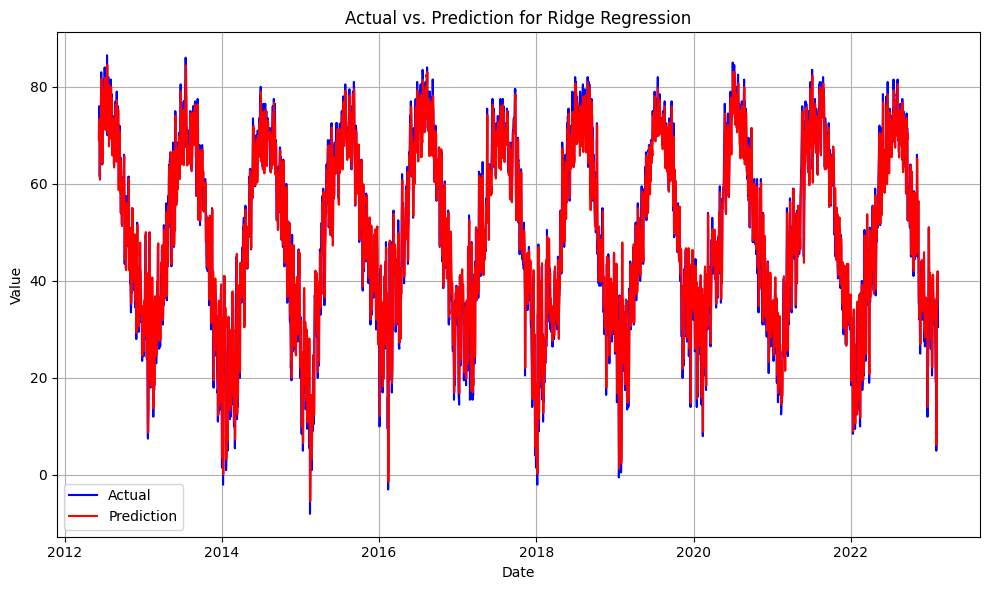

In [23]:
# Assuming 'predictions' is your DataFrame with date as index and columns: actual, prediction
plt.figure(figsize=(10, 6))
plt.plot(predictions_rr.index, predictions_rr['actual'], label='Actual', color='blue')
plt.plot(predictions_rr.index, predictions_rr['prediction'], label='Prediction', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Prediction for Ridge Regression')

plt.legend()  # Show legend with labels
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
pd.Series(reg.coef_, index=predictors)

prcp   -3.245597
tmax    0.216718
tmin    0.426863
tavg    0.321790
dtype: float64

### Decision Tree Regression Model

We employed a Decision Tree model, a versatile machine learning algorithm used for both regression and classification tasks. It operates by recursively partitioning the feature space into regions that best separate the target variable. Each split is determined by evaluating a feature and a corresponding threshold, leading to a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents the predicted outcome.

We instantiated a Decision Tree model with default parameters and trained it on historical weather data. The model's hyperparameters, such as maximum depth, minimum samples split, and minimum samples leaf, were fine-tuned using grid search with cross-validation to optimize performance.

We implemented a custom backtesting function that iterated over the dataset, splitting it into training and testing sets using a rolling window approach. At each iteration, the model was trained on the training data and evaluated on subsequent time periods using the testing data. This iterative process allowed us to assess the model's performance across different time intervals and detect potential overfitting or underfitting.

In [25]:
# Create an instance of the DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for grid search (if desired)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 1, 2, 3, 4]  # Add valid options for max_features
}

# Call the backtest function with the decision tree model
predictions_dt = backtest(data, decision_tree_model, predictors, param_grid=param_grid, cv = 5, scoring = 'neg_mean_squared_error')

# Print the predictions
print(predictions_dt)

            actual  prediction      diff
DATE                                    
2012-06-08    69.5   69.916667  0.416667
2012-06-09    74.5   68.916667  5.583333
2012-06-10    76.0   70.833333  5.166667
2012-06-11    68.0   77.000000  9.000000
2012-06-12    61.5   60.078947  1.421053
...            ...         ...       ...
2023-02-06    40.0   32.530726  7.469274
2023-02-07    41.0   40.707407  0.292593
2023-02-08    40.5   43.382979  2.882979
2023-02-09    35.5   35.250000  0.250000
2023-02-10    30.5   35.480978  4.980978

[3869 rows x 3 columns]


##### Mean Absolute Error for Decision Tree Regression

In [27]:
mean_absolute_error(predictions_dt["actual"], predictions_dt["prediction"])

4.5053092052205255

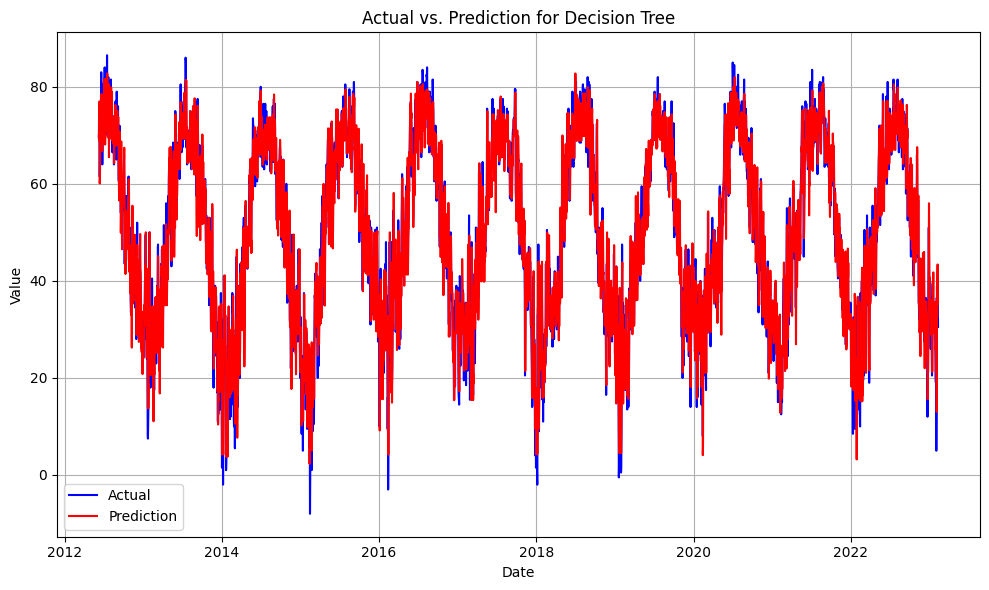

In [28]:
# Assuming 'predictions' is your DataFrame with date as index and columns: actual, prediction
plt.figure(figsize=(10, 6))
plt.plot(predictions_dt.index, predictions_dt['actual'], label='Actual', color='blue')
plt.plot(predictions_dt.index, predictions_dt['prediction'], label='Prediction', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Prediction for Decision Tree')

plt.legend()  # Show legend with labels
plt.grid(True)
plt.tight_layout()
plt.show()

## Observation and Conclusion

The average temperature prediction models developed using Ridge Regression and Decision Tree algorithms exhibit distinct characteristics and performance metrics based on our analysis.

##### Ridge Regression Model:
Mean Absolute Error (MAE): 4.3 degrees Celsius \
The Ridge Regression model demonstrates relatively lower prediction errors compared to the Decision Tree model, with an MAE of 4.3 degrees Celsius.
Ridge Regression offers a linear approach with regularization, which helps in managing multicollinearity and overfitting.
Despite its linear nature, the Ridge Regression model effectively captures the underlying trends and patterns in the data, resulting in reasonably accurate temperature predictions.
The model's predictions are generally closer to the actual values of the average temperature, indicating its effectiveness in forecasting temperature trends.

##### Decision Tree Model:
Mean Absolute Error (MAE): 4.5 degrees Celsius \
The Decision Tree model exhibits slightly higher prediction errors compared to the Ridge Regression model, with an MAE of 4.5 degrees Celsius.
Decision Trees offer a non-linear approach, allowing for the capture of complex relationships and interactions among features.
While Decision Trees provide flexibility and interpretability, they may be prone to overfitting, leading to slightly higher prediction errors compared to Ridge Regression.
Despite the higher MAE, the Decision Tree model still offers valuable insights into temperature prediction, particularly in capturing non-linear relationships between weather features and average temperature. \

Overall, both models contribute to our understanding of temperature prediction in Toronto, with Ridge Regression offering lower prediction errors and Decision Trees providing insights into complex relationships within the dataset.

# Sources

https://github.com/LCM-org/BDM_1034_weather_prediction_group5/blob/master/GHCND_documentation.pdf \
https://github.com/Diwas524/Weather-Prediction-Using-Machine-Learning/blob/main/Weather%20Prediction%20Using%20Machine%20Learning.ipynb \
https://github.com/neetika6/Machine-Learning-Model-for-Weather-Forecasting/blob/main/forecast.ipynb \
https://www.kaggle.com/code/jibinmadayil/weather-prediction \
https://www.youtube.com/watch?v=baqxBO4PhI8 